<a href="https://colab.research.google.com/github/liamedeiros/Newton2BlackHoles/blob/main/solutions/Measuring_the_Mass_of_Our_Black_Hole_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Measuring the Mass of Our Black Hole Solutions

This notebook primarily follows the Day 3 curriculum of ["From Newton to Black Holes"](https://www.dropbox.com/s/kbfx7bq4eukopuz/Lesson%20Plan_From%20Newton%20to%20Black%20Holes.pdf?dl=0), which was developed as part of the NSF funded project [Black Hole PIRE](https://bhpire.arizona.edu/).

Learning objectives for this notebook:
* Apply Kepler's laws to real astronomical data (the orbits of stars around the galactic center black hole)

* Measure the mass of the black hole in the center of the Milky Way

* Use the measured mass to estimate the size of the black hole shadow that the Event Horizon Telescope will observe.


This notebook assumes that you have completed the "Introduction to basic programming and plotting" notebook and the "Measuring the mass of the sun" notebook.


Before we begin, please compile the cell below to load in the necessary libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
# from matplotlib import rcParams
from matplotlib import rc
%matplotlib inline
!apt-get update
!apt install cm-super
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [458 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,136 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [923 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,241 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:13 http://s

In the notebook "Measuring the Mass of Our Sun", you explored Kepler's laws of planetary motion, applied it to the orbits of the planets in our Solar System, and used it to measure the mass of our Sun. Here is a quick review:

Kepler's 3rd law states that the cube of the distance between a planet and the Sun (the orbital separation) is proportional to the square of the time it takes the planet to complete one full orbit (the orbital period). In other words,

$a^3 = \left( \frac{GM}{4\pi^2}\right)T^2$

Here $a$ is the orbital separation of the planet, $T$ is the orbital period, $M$ is the mass of the Sun, and $G=6.67\times10^{-11}\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}$ is the gravitational constant.

This expression suggests that, if we were to plot the cubes of the orbital separations of the planets in the Solar System against the square of their orbital periods, all points will line up on a single line that goes through the origin. Moreover, the slope of the line will be proportional to the mass of the Sun. The slope of the line that goes through the data points is proportional to the mass of the Sun.  
We can use the slope of the line to measure the mass of the Sun and find

$M_{\mathrm{sun}} = 1.99 \mathrm{\,octillion\, metric\, tons}$

(one octillion is equal to 1 billion billion billion or $10^27=1,000,000,000,000,000,000,000,000,000$ in scientific notation)

Under Newton's assumption of Universal Gravitation, Kepler's 3rd law should be valid for all orbiting objects. We can, therefore, apply the same law to the data of stars that orbit Sgr A*, the black hole in the center of the Milky Way, in order to measure the mass of the black hole. To do this, it is better to use units that are more appropriate for the distances and masses that one measures near the galactic center.


If we express the orbital separation of stars from the central black hole in hundreds of astronomical units (one astronomical unit or AU is defined as the average distance between the Sun and the Earth, about 150 million km), their orbital periods in Earth years (365 days), and the mass of the black hole in millions of solar masses, then Kepler's 3rd law takes the form


$\left(\frac{a}{100\mathrm{AU}}\right)^3 = \left( \frac{M}{\mathrm{million \, solar \, masses}}\right)\left( \frac{T}{\mathrm{year}}\right)^2$

Astronomers at the Max-Planck-Institut für extraterrestrische Physik (MPE) in Germany and at the University of California, Los Angeles (UCLA) in the USA have been monitoring the positions of stars that orbit Sgr A*. They use large telescopes in Hawai'i and Chile and adaptive optics that allow them to correct for the atmospheric variations in the positions of the stars (the twinkling of the stars).

The figure below shows one of the images taken by the UCLA group where they superimposed the positions (white dots along the orbits) of some of the stars as measured between 1995 and 2014. Andrea Ghez (UCLA) and Reinhard Genzel (MPE) [won the 2020 Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/press-release/) for this work!

![S Star Orbits](https://github.com/liamedeiros/Newton2BlackHoles/blob/main/S_star_orbits.jpg?raw=1)




The following table provides the orbital separations (in hundreds of astronomical units) and the orbital periods (in years) of the innermost ten stars in orbit around Sgr A* as measured by the MPE group. You can find the 2009 peer-reviewed publication that reported these measurements [here](https://iopscience.iop.org/article/10.3847/1538-4357/aa5c41/pdf).

Star | Period (T) [years] | orbital Separation (a) [100 AU]
-----|--------------------|------------------
S55  | 12.8               | 8.82
S2   | 16.0               | 10.3
S38  | 19.2               | 11.6
S21  | 37.0               | 17.9
S18  | 41.9               | 19.4
S23  | 45.8               | 20.7
S13  | 49.0               | 21.6
S9   | 51.3               | 22.3
S14  | 55.3               | 23.4
S12  | 58.9               | 24.5

1. **In the cell below define an array that will contain the period of the stars (period), and a second array that will contain the average separation between the Sgr A* and the star (separation). Plot the separation along the  𝑦-axis and the period along the  𝑥-axis. Remember to add a grid and label your axes.**


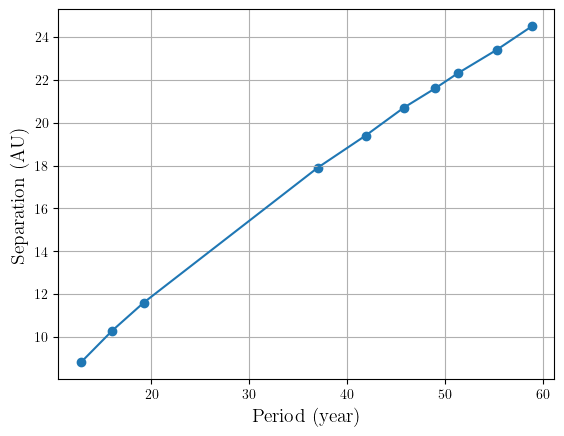

In [6]:
# Solution!

period = np.array([12.8, 16.0, 19.2, 37.0, 41.9, 45.8, 49.0, 51.3, 55.3, 58.9])
separation = np.array([8.82, 10.3, 11.6, 17.9, 19.4, 20.7, 21.6, 22.3, 23.4, 24.5])

plt.plot(period, separation)
plt.scatter(period, separation)

plt.ylabel('Separation (AU)', fontsize=14)
plt.xlabel('Period (year)', fontsize=14)
plt.grid()

2. **Now define a new array that will contain the period squared (```period_squared```) and another new array that will contain the separation cubed (```separation_cubed```). Plot the period squared on the  𝑥-axis and the separation cubed along the  𝑦-axis. Remember to add a grid and label your axes. Remember that to square the variable ```a``` you would write** ```a**2```**. Do the points fall on a line, as predicted by Kepler's 3rd law?**

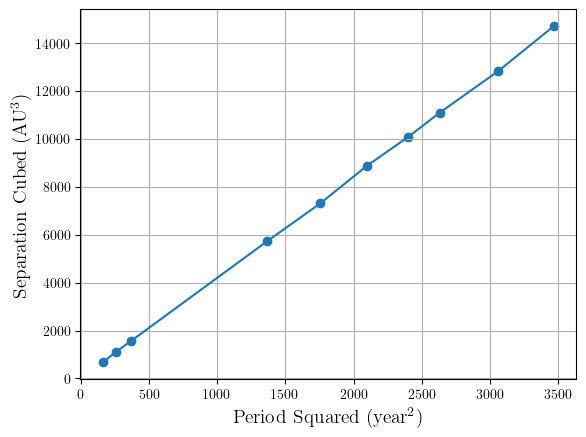

In [7]:
# Solution!

separation_cubed = (separation)**3
period_squared = period**2

plt.plot(period_squared, separation_cubed)
plt.scatter(period_squared, separation_cubed)

plt.ylabel('Separation Cubed (AU$^3$)', fontsize=14)
plt.xlabel('Period Squared (year$^2$)', fontsize=14)
plt.grid()

3. **Now we will use the same function that we used in the notebook "Introduction to basic programming and plotting" to find the slope of the line. Rememeber that we are fitting the equation  $y=mx+b$ and finding the best-fit values for the slope ($m$) and intercept ($b$). The function we will use is ```scipy.stats.linregress```, feel free to look back at the other notebook(s) to remember how to use this function. In the cell below use this function to fit a line to the points we plotted above and print out the slope of the line.**

In [8]:
# Solution!

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(period_squared, separation_cubed)
print(slope)

4.2159959563570615


4. **Let's check if the fit looks good compared to our data points by plotting the best-fit line over the points. Copy the code from exercise 8 below and add a line defined by $y=mx+b$ where $m$ and $b$ are given by the fit. You can reference the "Introduction to programming" notebook for this if you'd like.**

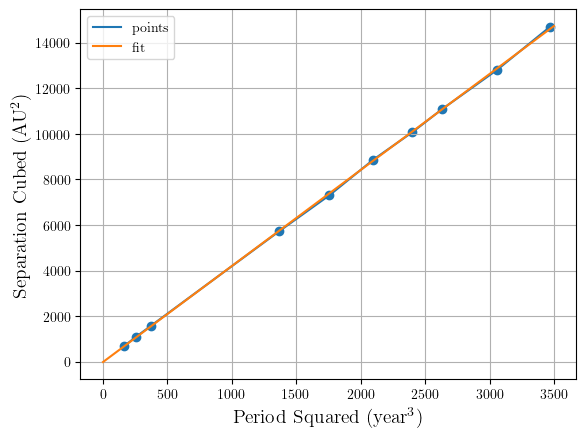

In [9]:
# Solution!

x_fit = np.arange(3500)
y_fit = slope*x_fit + intercept

plt.plot(period_squared, separation_cubed, label='points')
plt.scatter(period_squared, separation_cubed)

# plt.xlim([0, 4])
# plt.ylim([0, 4])

plt.plot(x_fit, y_fit, label='fit') # this commmand plots a line that shows the best fit to our points

plt.ylabel('Separation Cubed (AU$^2$)', fontsize=14)
plt.xlabel('Period Squared (year$^3$)', fontsize=14)
plt.grid()
plt.legend()

5. **According to the equations above (with the appropriate units), the slope of the line above is equal to:**

$ \left( \frac{M}{\mathrm{million \, solar \, masses}}\right)$.

**What is the value for the mass of the black hole in the center of the Milky Way that is consistent with the slope that you have measured?**



In [10]:
# Solution!

mass_of_SgrA = (slope) # this is in units of octillion ton
print('mass of Sgr A* is: ', mass_of_SgrA, 'million solar masses')

mass of Sgr A* is:  4.2159959563570615 million solar masses


## Congratulations! You have used astronomical data to measure the mass of the black hole in the center of the Milky way!


Now that we've measured the mass of the black hole using Kepler's 3rd Law, we will compare our mass measurement to the EHT's image of Sgr A*.

If Einstein's theory of General Relativity (GR, the theory that explains how gravity works) is correct, then there is a very specific prediction for the size of the ring in the image, based on the mass of the black hole. We will now load in the EHT's image of Sgr A* below. **Execute the three cells below.** Your should see the image of Sgr A* that the EHT published in May of 2022.












In [11]:

def open_hdf5(file_name):
    import h5py
    file    = h5py.File(file_name, 'r')
    name    = list(file.keys())[0]
    d       = file[str(name)]
    result = d[:]
    file.close()
    return(result)

In [12]:
!git clone https://github.com/liamedeiros/Newton2BlackHoles.git

fatal: destination path 'Newton2BlackHoles' already exists and is not an empty directory.


1.2444597828894675


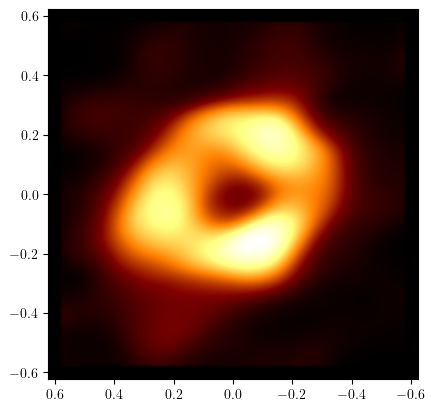

In [13]:
FoV_SgrA_AU = 1.2444597828894675 # Field of view of the Sgr A* image, in units of AU

SgrA_image = open_hdf5('Newton2BlackHoles/SgrA_image.h5')
plt.imshow(SgrA_image, extent =[FoV_SgrA_AU/2., -FoV_SgrA_AU/2., -FoV_SgrA_AU/2., FoV_SgrA_AU/2.], cmap='afmhot', interpolation="bicubic", vmax=np.max(SgrA_image))

print(FoV_SgrA_AU)


Now we need to calculate the size that the bright ring of emission should have if Einstein's theory is correct.


The size of the black hole shadow of the black hole will be proportional to its mass. According to the Theory of General Relativity, the diameter of the shadow is equal to

$\mathrm{diameter} = 10\left( \frac{GM}{c^2}\right)$

Here $M$ is the mass of the black hole, $G$ is the gravitational constant, and c is the speed of light ($c=299,792,458\mathrm{\,m/s}$).

6. **In the code below plug in the value for the mass of Sgr A* (in units of millions of solar masses) that you calculated above and solve for the size (in AU) that the blakc hole shadow should have, if General Relativity is correct.**

In [14]:
BHmass = 4.2 # here plug in the value for the mass that you calculated, in units of millions of solar masses.

diameter_shadow_AU = 0.099*BHmass # here the number 0.099 is equal to 10G(1 million solar masses)/c^2 in units of AU



7. **We will now plot a circle on top of the image of Sgr A*. The radius of this circle will be given by the mass that you found above. Execute this cell. Does the size of the circle (based on the mass you measured) match the size of the ring in the image?**

0.20790000000000003


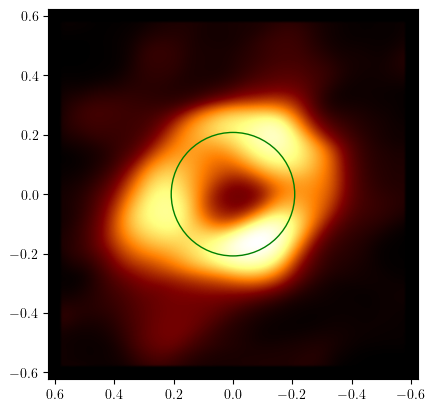

In [15]:
radius = diameter_shadow_AU/2.

# The line below will plot the image of Sgr A*
plt.imshow(SgrA_image, extent =[FoV_SgrA_AU/2., -FoV_SgrA_AU/2., -FoV_SgrA_AU/2., FoV_SgrA_AU/2.], cmap='afmhot', interpolation="bicubic", vmax=np.max(SgrA_image))

# The lines of code below generate a circle centered at (0, 0), with radius=1, and plots it
circle = plt.Circle((0, 0), radius, fill=False, color='green')
plt.gca().add_patch(circle)
print(radius)